# CoderHouse: Carrera de Data Sciencie

## Data Science I: Fundamentos para la Ciencia de Datos

### Alumno: Pablo Sotomayor

### Comisión: 61750

## Introducción

La fidelización de los clientes es un punto central de las compañias en la actualidad. Las compañias se desarrollan, existen y se sostienen debido a la existencia de los mismos. Esta situacion se profundiza aún mas cuando hablamos de instituciones financieras tradicionales, las cuales en los últimos años han enfrentado una competencia sin precedentes(debido a los nuevos formatos de instituciones financieras).
Por tal motivo el análisis y la predicción de la perdida o deserción de clientes es fundamental para la toma de desiciones, de los bancos tradicionales, en relación a las politicas de retención de cartera (clientes).
Como respuesta a ello, este trabajo se centra en la exploración, analisis y tratamiento de un conjunto de datos relacionados con la deserción de clientes y, en consecuencia, en la construcción de un modelo de clasificación que predice si un cliente abandonará el banco o no.  

## Descripción del Problema

La deserción de clientes es un problema que pone en riesgo las ganancias de la compañia (el banco), asi como también, su estabilidad y solvencia. Desarrollar un modelo predictivo clasificatorio, con la calidad suficiente, que arroje diferentes insights, es de suma importancia para la toma de decisiones en relación a la retención de clientes.

## Objetivo

El objetivo primordial de este trabajo es construir un modelo de aprendizaje supervisado clasificatorio, que sea capaz de predecir si un cliente va a abandonar el banco o no.


## Fuente de datos

El dataset empleado en este trabajo fue obtenido de Kaggle:

https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

Este dataset cuenta con información relevante acerca de clientes, características de los mismos y perfil bancario de estos (productos, antiguedad, puntaje crediticio, etc). Esta información nos permitirá crear un modelo predictivo para determinar la desercion de clientes.


## Importación de Librerías

In [2443]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from scipy.stats import skew
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report
import numpy as np

## Carga y ordenamiento de datos

In [2444]:
url = 'https://raw.githubusercontent.com/Psotomay/CoderDS1/refs/heads/main/Bank%20Customer%20Churn%20Prediction(abando%20del%20banco%20o%20no).csv'
df = pd.read_csv(url,index_col=False)#.sort_index(axis=0)#index_col=0
df.sort_values(by='customer_id',ignore_index=True,inplace=True,na_position='first')
df.head(6).round(2)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0
1,15565706,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1
2,15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
3,15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
4,15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
5,15565806,532,France,Male,38,9,0.00,2,0,0,30583.95,0


## Exploración o Minería de Datos

El propósito de la exploración de datos es descubrir patrones y relaciones entre las variables de un conjunto de datos. Para realizar este cometido vamos a analizar el conjunto de datos para comprender sus características y distribuciones.
- Resumen Inicial: Visualizar la metadata del conjunto de datos, obtener una primera vista de los mismos y mostrar las primeras y últimas filas del DF.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Establecer relaciones: Determinar posibles relaciones entre las variables de input y la variable target. Realizar Hipotesis.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos y mostrar relaciones.

In [2445]:
df.shape

(10000, 12)

El data set tiene un total de **10 mil** registros.

In [2446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### **Primera Visualización**


El dataset contiene **10 mil registros** (filas) y 12 columnas. Las columnas son nuestras variables. Dentro de las variables se encuentra el customer_id que no se utilizaría para establecer relaciones. Tenemos también 10 variables que son variables de entrada, que podrían utilizarse para establecer relaciones. Por último tenemos la variable churn que sería nuestra variable target, es decir, la variable a predecir.
Por otro lado observamos que no hay datos faltantes o vacíos ya que en todas las columnas los non null son 10 mil al igual que la cantidad de registros.

-------------------------------------------------------------

**Variables Potencialmente Relevantes:**

Algunas variables que podrían ser relevantes para predecir la deserción o el abandono de un cliente podrían ser: "credit_score", "tenure", "balance", "products_number", "credit_card" y "estimated_salary".

### **Variable Target u objetivo (churn)**

- La variable target, sobre la que vamos a predecir es **`churn`**, de tipo `int64`, y es **binaria**, es decir nos va a permitir construir un modelo de clasificación binaria.
  - **0** indica que el cliente no abandonó el banco.
  - **1** indica que el cliente abandonó el banco.


### **Conclusión Inicial**


- Si bien observamos que no existen valores nulos debemos corroborar,ahondar y analizar en profundidad los datos para validar la integridad de los mismos y corregir los desvios.
- La variable **churn** es el centro del modelo y es fundamental para predecir si un cliente va a abandonar el banco o no. Como solo el 20% de los clientes de nuestro dataset abandonaron el banco, al ser binaria la variable, podría necesitar técnicas de balanceo. Es decir 1 es la clase minoritaria y podrían no ser suficiente los casos de abandono para el entrenamiento del modelo.
- Es importante considerar transformar las variables categoricas en números. Es decir codificar estas variables antes de incluirlas en nuestro modelo. Quizas a través de la tecnica one-hot encoding.


In [2447]:
df.head(20).round(2)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0
1,15565706,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1
2,15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
3,15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
4,15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
5,15565806,532,France,Male,38,9,0.00,2,0,0,30583.95,0
6,15565878,631,Spain,Male,29,3,0.00,2,1,1,197963.46,0
7,15565879,845,France,Female,28,9,0.00,2,1,1,56185.98,0
8,15565891,709,France,Male,39,8,0.00,2,1,0,56214.09,0
9,15565996,653,France,Male,44,8,0.00,2,1,1,154639.72,0


In [2448]:
df.tail(20).round(2)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9980,15815259,835,France,Female,56,2,0.00,2,1,1,39820.13,0
9981,15815271,755,Germany,Male,43,6,165048.50,3,1,0,16929.41,1
9982,15815295,662,France,Female,38,2,96479.81,1,1,0,120259.41,0
9983,15815316,644,France,Male,50,9,76817.00,4,1,0,196371.13,1
9984,15815364,736,Spain,Female,28,2,0.00,2,1,1,117431.10,0
9985,15815420,808,Spain,Male,47,8,139196.00,1,0,1,74028.36,0
9986,15815428,823,France,Male,34,3,105057.33,1,1,0,9217.92,0
9987,15815443,527,Spain,Female,46,10,131414.76,1,1,0,54947.51,0
9988,15815490,670,Germany,Male,40,2,164948.98,3,0,0,177028.00,1
9989,15815530,612,France,Female,42,10,75497.51,1,0,0,149682.78,0


In [2449]:
df.iloc[:,1:].describe().round(2)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


**Credit_score:**
- Se observa que las filas no nulas son 10 mil. Por ende no hay nulos.
- El promedio del puntaje crediticio es 650,53.
- El puntaje crediticio minimo es 350 mientras que el maximo es 850.
- La desviación estandar es de 96,65 por lo cual es baja e indica que los valores se encuentran cerca de la media.

**Age:**
- No hay nulos.
- Promedio de edad es casi 34 años.
- Edad minima es de 18 y la maxima de 92. Podrían haber valores atípicos o outliers. Tenemos una std alta.
  

**Tenure:**
- No hay valores nulos.
- El promedio de la permanencia de los clientes es de 5 años aproximadamente.
- El valor minimo es 0 y el maximo 10 años. El 0 no es un valor atípico ya que no se encuentra distante de los demas y es un caso común.
- La std es de 2,89. Si tenemos en cuenta la unidad de medida es alta. En este caso podría indicar que los valores se encuentran lejos o dispersos en relación a la media.

**Balance:**
- No hay nulos.
- El promedio de los saldos es 76485,89.
- El minimo es 0 y el máximo es 250898,08. Esto podría indicar que 0 es un valor atípico. Tambien el maximo ya que esta muy lejos del promedio.
- La desviación estándar es alta. Esto nos indicaría que los valores se encuentran lejos de la media. Pero tambien la std podría verse afectada por los valores atípicos.

**Products_number:**
- no hay nulos
- El promedio de la cantidad de productos es 1.53
- El minimo es 1 y el maximo 4.

**Credit_card:**
- El 70 por ciento de los clientes tiene tarjeta de credito.

**Estimated_salary**
- Tiene un promedio de casi 100 mil.
- Minimo 11,58 y máximo de 200.000 aproximadamente.
- std alta. Es decir lo valores se encuentra lejos del promedio.
- Podría ser que presente valores atípicos tanto minimos como maximos.

**Churn:**
- Aproximadamente el 20 % de los clientes abandono el banco.

- **Valores extremos**: hay 3 variables que parecen presentar valores extremos a priori. Aquí podemos encontrar outliers o valores atípicos. Estas variables son: age, balance y estimated_salary. Debe ser analizado cuando se realice el preprocesamiento de datos y la limpieza.

- **Datos faltantes**: en principio no habría datos faltantes ya que no tenemos nulos, ni otros valores que indiquen que falten los mismos. Debe ser corroborado en la etapa de preprocesamiento de datos.  


### Hipótesis:

1. Existe una diferencia en cuanto al nivel de deserción de acuerdo al país del cliente.
2. Existe una diferencia en cuanto al nivel de deserción de acuerdo al genero del cliente.
3. El abandono del banco varía linealmente en relación con el puntaje crediticio: a menor credit_score mas deserción.
4. Cuanto mayor es el tiempo de permanencia menor es la deserción.
5. La deserción aumenta cuando disminuye el saldo de la cuenta: a menor saldo mas abandono.
6. A menor cantidad de productos mayor deserción. Es decir la permanencia aumenta con la cantidad de productos.

#### Diferencia de abandono por país

In [2450]:
# calculamos el numero de casos de abandono por país. numero sin tener en cuenta la cantidad de clientes por pais.
churn_by_country_sum = df.groupby('country')['churn'].sum()
# Porcentaje de abandono de cada pais. Se tiene en cuenta la cantidad de clientes.
churn_by_country_percentage = df.groupby('country')['churn'].mean() * 100
print(churn_by_country_sum,
churn_by_country_percentage)

country
France     810
Germany    814
Spain      413
Name: churn, dtype: int64 country
France     16.154767
Germany    32.443204
Spain      16.673395
Name: churn, dtype: float64


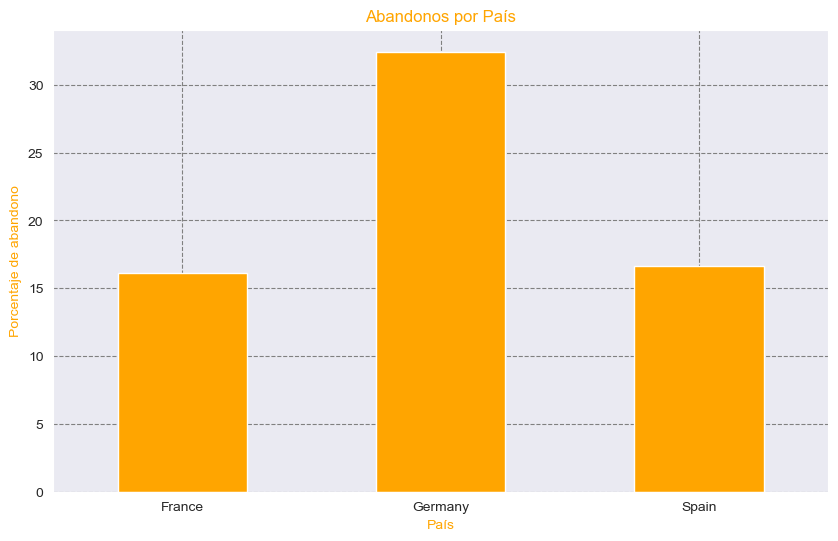

In [2451]:
plt.figure(figsize=(10, 6))
churn_by_country_percentage.plot(kind='bar', rot=0,color='orange')
plt.xlabel('País',color = 'orange')
plt.ylabel('Porcentaje de abandono',color = 'orange')
plt.title('Abandonos por País',color = 'orange')

plt.show()


Podemos observar que hay una significativa diferencia entre Alemania y los otros países (Francia y España) en cuanto a la deserción de clientes. Si bien en cuanto al número de deserciones, Francia y Alemania tienen números similares ( Francia 810 y Alemania 814) cuando analizamos los porcentajes Alemania posee el doble de abandonos que Francia y España. Esto se debe a que Francia tiene el doble de clientes que Alemania.
En conclusion: Alemania, con un 32% posee el indicador mas grande de deserciones y las probabilidades mas grandes de deserción. Francia y España estan ambos muy parejos compartiendo el segundo lugar con un 16%.

#### Diferencia por Género

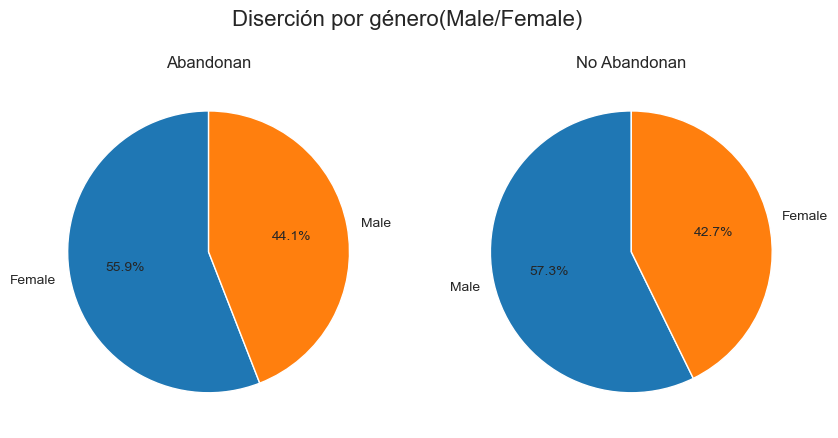

In [2452]:
#Filtramos para que solo traiga Male y Female. Esto es por si hay algun dato sucio que en esta columna no tenga alguno de esos valores.
filtered_df = df[df['gender'].isin(['Male', 'Female'])]
# Calculo porcentaje para los que abandonan. No hacemos por 100 por que el grafico de torta lo calcula solo.
gender_churn = df[filtered_df['churn'] == 1].value_counts(subset='gender',normalize=True)
#No abandonan
gender_no_churn = df[filtered_df['churn'] == 0].value_counts(subset='gender',normalize=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Grafico para los que abandonan
ax[0].pie(gender_churn, labels=gender_churn.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Abandonan')

#Grafico para los que no abandonan
ax[1].pie(gender_no_churn, labels=gender_no_churn.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('No Abandonan')

plt.suptitle('Diserción por género(Male/Female)', fontsize=16)
plt.show()


Como vemos en los gráficos no hay una diferencia sustancial ni un patron relacional entre los abandonos por género. Es apenas un tanto mas elevado en las mujeres pero no se puede establer una relacion entre el género y las deserciones.  

#### Diserción y puntaje crediticio

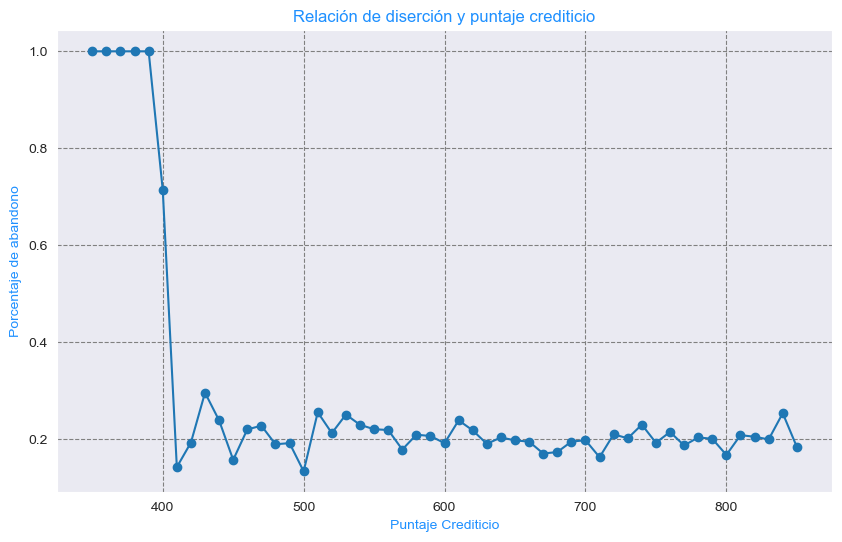

In [2453]:
# nueva columna para agrupar de a 100 los valores.
df['credit_score_group'] = (df['credit_score'] // 10) * 10
churn_by_credit_percentage = df.groupby('credit_score_group')['churn'].mean()

#churn_df = pd.DataFrame({'credit_score':churn_by_credit_percentage.index,'churn':churn_by_credit_percentage.values})

plt.figure(figsize=(10, 6))
#plt.plot(churn_df['credit_score'],churn_df['churn'], marker='o', linestyle='--')
plt.plot(churn_by_credit_percentage.index,churn_by_credit_percentage.values, marker='o')
plt.xlabel('Puntaje Crediticio', color='dodgerblue')
plt.ylabel('Porcentaje de abandono', color='dodgerblue')
plt.title('Relación de diserción y puntaje crediticio', color='dodgerblue')
plt.grid(True)

plt.show()




Observamos que, si bien en el primer percentil de 300 a 400 se produce el pico de abandonos o deserciones, pico muy alto, luego en los otros percentiles se mantiene constante el porcentaje mencionado. Por ende la relacion o variación no es lineal: a menor puntaje crediticio no hay mayor diserción. Se observa que el foco de abandonos se da solo en los clientes que poseen el menor puntaje crediticio.

#### Diserción y años de permanencia

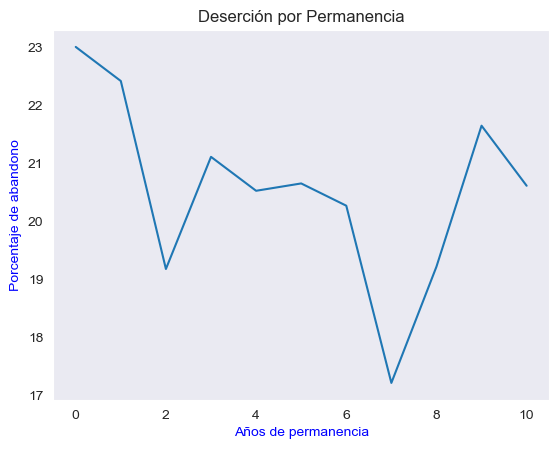

In [2454]:
churn_by_tenure = df.groupby('tenure')['churn'].mean() * 100
churn_by_tenure_df = pd.DataFrame({'Tenure': churn_by_tenure.index, 'Churn': churn_by_tenure.values})

#plt.figure()
ax = sns.lineplot(data=churn_by_tenure_df,x='Tenure', y='Churn') #sns.relplot(x = "x", y = "y", data = df, kind = "line");
ax.set(xlabel='Años de permanencia', ylabel='Porcentaje de abandono', title='Deserción por Permanencia')
ax.grid()


En este gráfico observamos que tampoco hay una correlacion lineal entre los años de permanencia y la deserción de los clientes. No es una relación lineal. Es decir no encontramos un patrón en el cual a mayor permanencia menor deserción. Salvo en el primer estrato que a menos años (0 a 1) mayor porcentaje de abandono despues es muy inestable. Por ejemplo de 6a 8 años es el pico minimo de abandonos. Pero a los 9 sube considerablemente.

#### Deserción y Saldo de cuenta

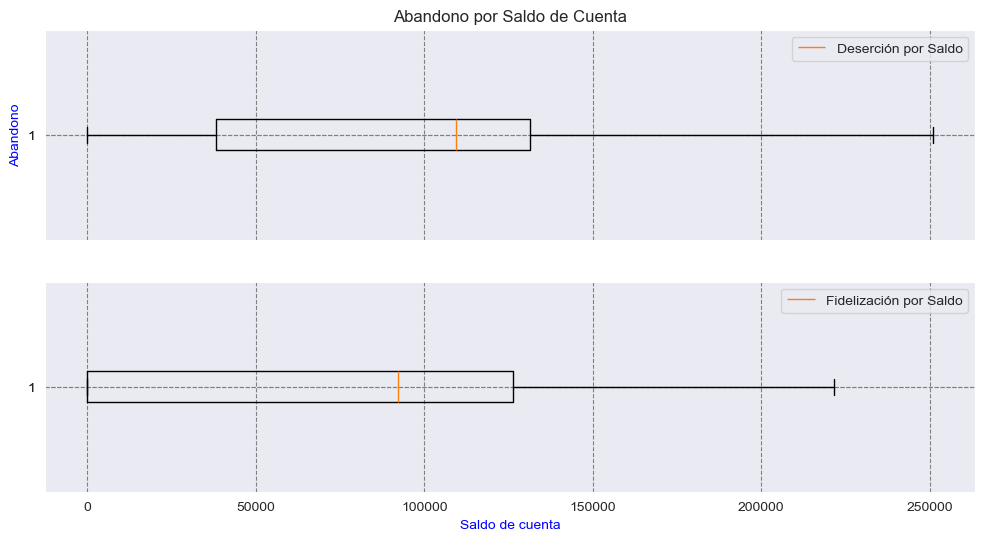

In [2455]:
churn = df[df['churn'] == 1]
no_churn = df[df['churn'] == 0]

#fig, ax = plt.subplots(2, 1, figsize=(12, 12))

#ax= sns.boxplot(x="balance", data=churn)
#ax.set(xlabel='Saldo de la cuenta', ylabel='Abandono', title='Deserción por Balance')
#ax.grid()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True, sharey=True)
ax[0].boxplot(churn['balance'], label='Deserción por Saldo',vert=False)
ax[1].boxplot(no_churn['balance'], label='Fidelización por Saldo',vert=False)

ax[0].set_title('Abandono por Saldo de Cuenta')
ax[1].set_xlabel('Saldo de cuenta')
ax[0].set_ylabel('Abandono')

ax[0].legend()
ax[1].legend()


Al contrario de lo que planteamos como premisa no existe relacion lineal entre el saldo de la cuenta y las deserciones, es decir a menos saldo no hay mayores deserciones. Si comparamos las deserciones(primer gráfico) con los clientes que se quedaron (segundo gráfico) vemos que los que se quedaron poseen valores en saldos iniciales mientras que los desertores no poseen saldo en ese percentil. Por otra partre vemos que la mediana tanto en el grupo que abandono como en el grupo que se quedo es muy similar. Lo que demuestra lo establecido en el primer párrafo.
Por último podemos decir que no se ven datos atípicos ni outliers si vemos por separado los que abandonaron y los que no. Esto último debemos corroborarlo cuando calculemos outliers, en la columna total, ya que en conclusiones preliminares este campo presentaba algún dato suceptible de ser atípico.

#### Deserción y Cantidad de Prodcutos

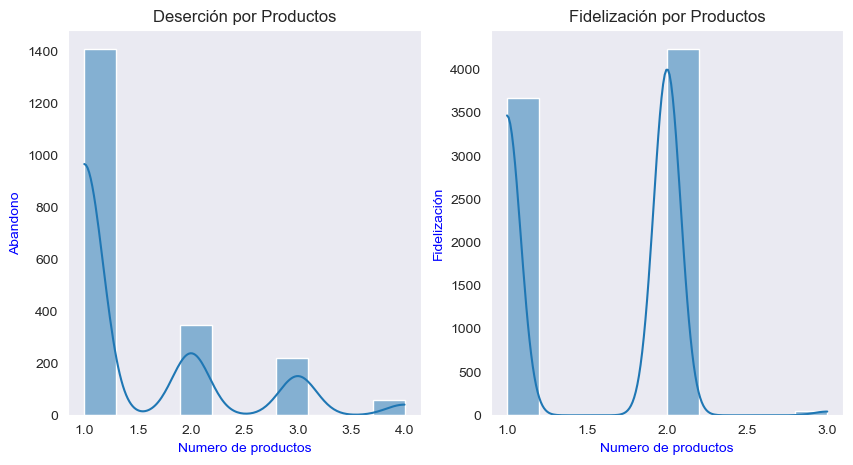

In [2456]:
sns.set_style(style="darkgrid", rc={"grid.color": ".6"})
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlelocation": "left"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "blue"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "grey"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})
churn = df[df['churn'] == 1]
no_churn = df[df['churn'] == 0]

churn1= churn.sum()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax= sns.histplot(x="products_number", data=churn,ax=axes[0], bins=10,kde=True)
ax.set(xlabel='Numero de productos', ylabel='Abandono', title='Deserción por Productos')
ax.grid()

ax= sns.histplot(x="products_number", data=no_churn,ax=axes[1],bins=10, kde=True)
ax.set(xlabel='Numero de productos', ylabel='Fidelización', title='Fidelización por Productos')
ax.grid()



No es clara la relación entre la cantidad de productos y la deserción. Si bien en el primer gráfico se muestra que a menos productos hay mas deserción tambien en el gráfico de fidelización se muestra que muchos clientes con menos productos se quedan en el banco. Lo que sugiere que es el estrato con mayor cantidad de clientes. Luego tenemos que el pico de los que se quedan es con 2 productos. La relacion en si es irregular con variaciones poco claras que no siguen linealmente la relación.

## Preprocesamiento de Datos


En este apartado preparamos los datos para que el modelo sea eficiente y funcione correctamente. Es decir realizamos la limpieza, normalización y adecuación de los datos para tal cometido: Tratamos y corregimos los valores extremos (outliers) para que no incidan negativamente en el entrenamiento del modelo, manejamos los valores nulos o faltantes con diversas técnicas, se normalizan los datos que presenten diferencias, eliminamos las variables que no son relevantes para el modelo y codificamos las variables categóricas para que el modelo pueda procesarlas.

Corroboramos que el df no haya sufrido modificaciones (y si las sufrio poder divisarlas) y vemos como se componen las columnas para poder tratarlas:

In [2457]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,credit_score_group
0,15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0,690
1,15565706,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1,610
2,15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0,600
3,15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0,620
4,15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0,740


### Eliminar variables (columnas) irrelevantes

Aca vamos a eliminar las columnas de un solo valor y las irrelevantes para el modelo

In [2458]:
def drop_variables(dataFrame,columnas_irrelevantes):

    #Eliminar columnas especificas
    dataFrame = dataFrame.drop(columns = columnas_irrelevantes, axis=1)
    # Eliminar columnas con un solo valor
    dataFrame = dataFrame.drop(columns=[col for col in dataFrame.columns if len(dataFrame[col].unique()) == 1], axis=1)

    return dataFrame

In [2459]:
print(df.nunique())

customer_id           10000
credit_score            460
country                   3
gender                    2
age                      70
tenure                   11
balance                6382
products_number           4
credit_card               2
active_member             2
estimated_salary       9999
churn                     2
credit_score_group       51
dtype: int64


Arriba podemos observar que, las variables que pueden ser analizadas por la cantidad de valores que tienen en las columnas, estan correctas. Por ejemplo gender tiene dos valores lo que quiere decir que no hay que corregir datos. Tambien tenemos tres países y country tiene 3 valores.

In [2460]:
df = drop_variables(df,['customer_id','credit_score_group']) 
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0
1,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1
2,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
3,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
4,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0


### Outliers o valores atípicos

In [2461]:
def porcentajes_outliers_IQR(dataFrame):
    """
    Calcula el porcentaje de outliers para las columnas numéricas de un DataFrame
    utilizando el criterio del rango intercuartílico (IQR), excluyendo variables binarias.

    Args:
        df (pd.DataFrame): DataFrame de entrada.

    Returns:
        pd.DataFrame: DataFrame con columnas numéricas y su porcentaje de outliers,
                      ordenadas en orden decreciente.
    """
    resultados = [] #array para guardar resultados con append

    for variable in dataFrame.select_dtypes(include='number').columns:
        # Excluir variables binarias: nunique de pandas cuenta los diferentes valores de una columna. 2 binario.
        if dataFrame[variable].nunique() == 2:
            continue

        q1 = dataFrame[variable].quantile(0.25) #calculo del q1
        q3 = dataFrame[variable].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        #print(limite_inferior,limite_superior)

        # Calcular el porcentaje de outliers
        outliers = dataFrame[(dataFrame[variable] < limite_inferior) | (dataFrame[variable] > limite_superior)] # si es menor o mayor que los limites seteados arriba se guarda en la variable outliers
        porcentaje_outliers = (len(outliers) / len(df)) * 100 #se cuentan cuantos outliers hay por cada variable y se saca el porcentaje
        resultados.append((variable, porcentaje_outliers)) # se guarda en el array resultados.

    # Convertir a DataFrame y ordenar por porcentaje de outliers
    outliers_df = pd.DataFrame(resultados, columns=['Variable', 'Porcentaje_Outliers'])
    outliers_df = outliers_df[outliers_df['Porcentaje_Outliers'] > 0]
    outliers_df = outliers_df.sort_values(by='Porcentaje_Outliers', ascending=False).reset_index(drop=True)

    return outliers_df

In [2462]:
porcentaje_outlier = porcentajes_outliers_IQR(df)
print(porcentaje_outlier)

          Variable  Porcentaje_Outliers
0              age                 3.59
1  products_number                 0.60
2     credit_score                 0.15


A diferencia de lo que observamos en las visualizaciones preliminares y las conclusiones iniciales, solo la edad presenta un porcentaje a tomar en cuenta, de outliers. Balance y estimated_salary no presentan estos valores extremos. Se suma product_number y credit score pero ambos son muy bajos. 

In [2463]:
def plot_boxplot_outliers(dataFrame, columnas_outliers):
    
    # Normalizá las columnas con outliers
    scaler = MinMaxScaler() # esta clase escala los datos...entre 0 y 1 por defecto
    df_normalized = dataFrame.copy()
    df_normalized[columnas_outliers] = scaler.fit_transform(dataFrame[columnas_outliers]) 

    # grafico vertical
    plt.figure(figsize=(len(columnas_outliers) * 2, 10))
    sns.boxplot(data=df_normalized[columnas_outliers], orient='v')

    plt.title('Variables Outliers (Normalizadas)', fontsize=14)
    plt.ylabel('Valor Normalizado', fontsize=12)
    plt.xlabel('Variables', fontsize=12)
    plt.tight_layout()
    plt.show()

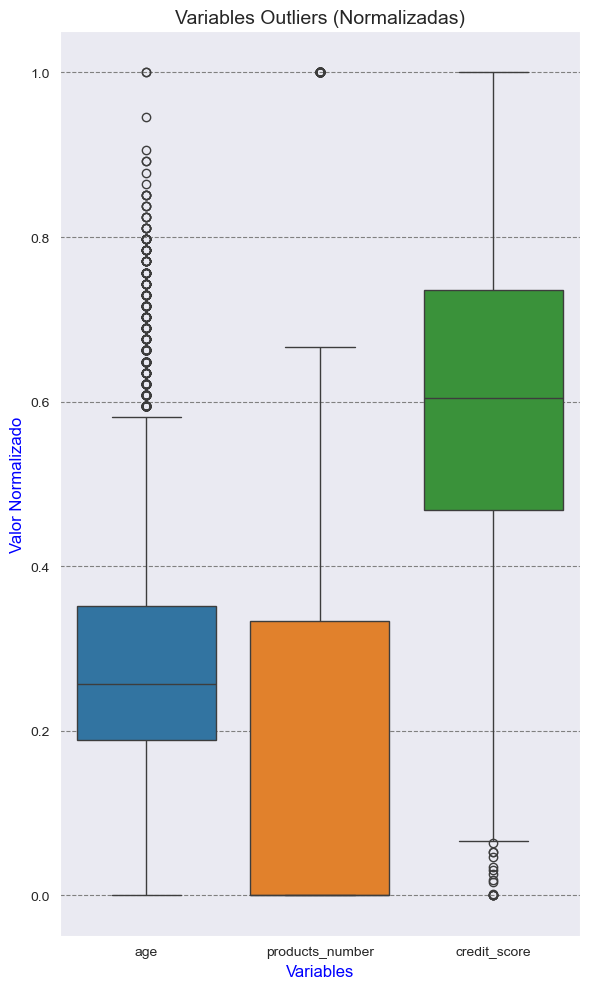

In [2464]:
plot_boxplot_outliers(df, porcentaje_outlier['Variable'].tolist())

- Vemos que las tres variables que mencionamos antes tienen valores atipicos o outliers: age, products_number y credit_score.
- Age: es la variable con mas outliers: posee valores extremos atípicamente altos.
- products_number: tambien posee algún valor extremo alto pero es minimo el porcentaje.
- credit_score: posee valores extremos atípicamente bajos. El porcentaje tambien es muy bajo. 

In [2465]:
def analizar_eliminacion_outliers(dataFrame, columnas_outliers, target = None):

        # límites del IQR para las columnas con outliers
    q1 = dataFrame[columnas_outliers].quantile(0.25)
    q3 = dataFrame[columnas_outliers].quantile(0.75)
    iqr = q3 - q1

    # Definir los límites inferior y superior para los outliers
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    #filas que no tengan outliers en las columnas especificadas. de las columnas outliers se sacan las filas que tengan el valor extremo
    sin_outliers = dataFrame[
        ~((dataFrame[columnas_outliers] < limite_inferior) | (dataFrame[columnas_outliers] > limite_superior)).any(axis=1)
    ]

    # Calcular el porcentaje de registros restantes
    porcentaje_restante = len(sin_outliers) / len(dataFrame) * 100

    # Calcular la distribución de la columna churn antes y después de la eliminación: contamos 
    distribucion_con_outliers = dataFrame[target].value_counts(normalize=True) * 100
    distribucion_sin_outliers = sin_outliers[target].value_counts(normalize=True) * 100

    # Crear un DataFrame resumen
    resumen = pd.DataFrame({
        'Distribución Con Outliers (%)': distribucion_con_outliers,
        'Distribución Sin Outliers (%)': distribucion_sin_outliers,
    }).fillna(0)

    # Imprimir resultados
    print(f"Porcentaje restante del dataset después de eliminar outliers: {porcentaje_restante:.2f}%\n")
    print("Distribución de la columna de abandono (antes y después de eliminar outliers):\n")
    print(resumen)

    outliers = dataFrame[
        ((dataFrame[columnas_outliers] < limite_inferior) | (dataFrame[columnas_outliers] > limite_superior)).any(axis=1)
    ]
    print(len(outliers))
    


In [2466]:
analizar_eliminacion_outliers(df,porcentaje_outlier['Variable'].tolist(),'churn')

Porcentaje restante del dataset después de eliminar outliers: 95.68%

Distribución de la columna de abandono (antes y después de eliminar outliers):

       Distribución Con Outliers (%)  Distribución Sin Outliers (%)
churn                                                              
0                              79.63                      80.236204
1                              20.37                      19.763796
432


Como puede verse en los valores porcentuales la variación de los resultados es insignificante. Por ende no es necesario eliminar las filas con outliers. 

### Valores nulos

Según observación premilinar no contamos con nulos. Por ende no tenemos que tratarlo. Vamos a corroborar que sea asi: 

In [2467]:
def calcular_porcentaje_nulos(dataFrame):
    
    # porcentaje de nulos
    porcentaje_nulos = dataFrame.isnull().mean() * 100 #isnull nos devuelve los nulos

    # Filtrar columnas con nulos y ordenar en orden decreciente
    nulos = (porcentaje_nulos[porcentaje_nulos > 0]
                .sort_values(ascending=False)
                .reset_index())
    nulos.columns = ['Variable', 'porcentaje_nulos']

    return nulos

In [2468]:
calcular_porcentaje_nulos(df)

,Variable,porcentaje_nulos


Tal como anticipamos no tenemos valores nulos. 

### Datos sinteticos

In [2469]:
def generate_customer_data(num_records):
    data = []
    for _ in range(num_records):
        age = np.random.randint(18, 80)
        
        # Rule: Income is loosely based on age
        #base_balance = 20000 + (age - 18) * 1000 uniform
        #balance = np.random.normal(base_balance, base_balance * 0.2)
        balance = np.random.uniform(0,250000)
        # Rule: Credit score is influenced by age and income
        #credit_score = min(850, max(300, int(600 + (age/80)*100 + (balance/100000)*100 + np.random.normal(0, 50))))
        credit_score =    np.random.randint(350,850)
        # Rule: Loan amount is based on income and credit score
        max_estimated_salary = np.random.uniform(0,200000)
        estimated_salary = np.random.uniform(0, max_estimated_salary)
        gender = np.random.choice(['Male', 'Female'])
        country = np.random.choice(['France', 'Spain','Germany'])
        tenure = np.random.randint(1, 11)
        products_number = np.random.randint(1, 5)
        credit_card = np.random.randint(0, 2)
        active_member = np.random.randint(0, 2)
        churn = np.random.randint(1,2)
        
        data.append([credit_score, country, gender, age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn])
   
    return pd.DataFrame(data,columns=['credit_score', 'country', 'gender', 'age','tenure','balance','products_number',
                                      'credit_card','active_member','estimated_salary','churn'])

In [2470]:
df1 = generate_customer_data(5000)
df = pd.concat([df, df1], ignore_index=True)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0
1,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1
2,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
3,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
4,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0


### Encoding y normalizado

Transformamos las variables categoricas a numeros. 

In [2471]:
def preprocesar_data(dataFrame):
    
    #- Realiza One Hot Encoding en variables categóricas con <= 8 categorías.
    #- Realiza Label Encoding en variables categóricas con > 8 categorías.
    #- Normaliza las variables numéricas entre 0 y 1.
    
    # Inicializamos los transformadores: las clases. 
    onehot_encoder = OneHotEncoder(sparse_output=False) #Drop por defecto es none. 
    label_encoder = LabelEncoder()
    scaler = MinMaxScaler()

    # Variables categóricas y numéricas
    categorias = dataFrame.select_dtypes(include=['object']).columns
    numericas = dataFrame.select_dtypes(exclude=['object']).columns

    # Si bien nuestro dataset no tiene variables categoricas mayores a 8 dejamos el label para futura data
    for col in categorias:
        if dataFrame[col].nunique() <= 8:
            encoded = onehot_encoder.fit_transform(dataFrame[[col]])
            encoded_df = pd.DataFrame(encoded, columns=onehot_encoder.get_feature_names_out([col]))
            dataFrame = pd.concat([dataFrame, encoded_df], axis=1)
            dataFrame.drop(columns=[col], inplace=True)
        else:
            dataFrame[col] = label_encoder.fit_transform(dataFrame[col])

    # Normalizamos las variables numéricas
    # Inicializar los escaladores
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

   # Iterar sobre las columnas numéricas y aplicar el escalado apropiado
    for col in numericas:
        if col !='churn':
        # Calcular skewness de la columna
            skewness = skew(dataFrame[col])

            # Escalar dependiendo del skewness
            if abs(skewness) > 1:
                # Si el skewness es alto, usamos MinMaxScaler
                dataFrame[col] = minmax_scaler.fit_transform(dataFrame[[col]])
            else:
                # Si el skewness es bajo, usamos StandardScaler
                dataFrame[col] = standard_scaler.fit_transform(dataFrame[[col]])

    return dataFrame

In [2472]:
df = preprocesar_data(df)

In [2473]:
df.head(10)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,0.545079,-0.209042,1.326598,1.007164,-0.925204,-1.324697,-1.015724,0.122192,0,0.0,0.0,1.0,1.0,0.0
1,-0.186596,-0.492035,-1.447261,-1.328011,-0.925204,0.754890,0.984520,0.003101,1,0.0,0.0,1.0,0.0,1.0
2,-0.280182,0.356944,-1.447261,-0.399239,0.155053,-1.324697,0.984520,0.230145,0,1.0,0.0,0.0,0.0,1.0
3,-0.058978,-0.845776,0.286401,-0.494678,-0.925204,0.754890,-1.015724,1.800768,0,0.0,1.0,0.0,1.0,0.0
4,0.944948,0.427692,1.673330,0.056548,-0.925204,0.754890,-1.015724,-0.146626,0,0.0,1.0,0.0,0.0,1.0
5,-0.867223,-0.279790,1.326598,-1.328011,0.155053,-1.324697,-1.015724,-0.898664,0,1.0,0.0,0.0,0.0,1.0
6,-0.024947,-0.916524,-0.753796,-1.328011,0.155053,0.754890,0.984520,1.966920,0,0.0,0.0,1.0,0.0,1.0
7,1.795732,-0.987272,1.326598,-1.328011,0.155053,0.754890,0.984520,-0.460350,0,1.0,0.0,0.0,1.0,0.0
8,0.638665,-0.209042,0.979865,-1.328011,0.155053,0.754890,-1.015724,-0.459869,0,1.0,0.0,0.0,0.0,1.0
9,0.162226,0.144699,0.979865,-1.328011,0.155053,0.754890,0.984520,1.225206,0,1.0,0.0,0.0,0.0,1.0


## Construcción de Modelos

Aca se construyen los modelos con los datos refinados y preprocesados. Se entrena el mismo y se testea.  

### Funciones y variables comunes

In [2474]:
semilla = 42

In [2475]:
def prepare_train_test_split(target):

    X = df.drop(columns=target) # todo menos la variable objetivo
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

    print(f"Tamaño de X_train: {X_train.shape}")
    print(f"Tamaño de X_test: {X_test.shape}")
    print(f"Tamaño de y_train: {y_train.shape}")
    print(f"Tamaño de y_test: {y_test.shape}")

    return X_train, X_test, y_train, y_test

In [2476]:
def entrenar_modelo(algoritmo,X_train, y_train, X_test,tf=False):
    start = time.time()
    #Entrenamiento modelo
    if tf:
        algoritmo.fit(X_train, y_train)
    else:
        modelo = algoritmo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Prediccion
    y_pred = algoritmo.predict(X_test) if not tf else np.where(algoritmo.predict(X_test) > 0.5, 1, 0)
    return tiempo_ejecucion, y_pred

In [2477]:
X_train, X_test, y_train, y_test = prepare_train_test_split('churn')

Tamaño de X_train: (10500, 13)
Tamaño de X_test: (4500, 13)
Tamaño de y_train: (10500,)
Tamaño de y_test: (4500,)


### Árbol de Decisión

In [2478]:
algoritmo_arbol = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    random_state = semilla)

In [2479]:
arbol_decision_tiempo, arbol_decision_prediccion = entrenar_modelo(algoritmo_arbol,X_train, y_train, X_test)

In [2480]:
print(arbol_decision_tiempo, arbol_decision_prediccion)

0.018597841262817383 [1 0 1 ... 1 0 1]


### Random Forest

In [2481]:
algoritmo_random = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=semilla,
    class_weight='balanced'
)

In [2482]:
random_forest_tiempo,random_forest_prediccion = entrenar_modelo(algoritmo_random,X_train, y_train, X_test)

In [2483]:
print(random_forest_tiempo,random_forest_prediccion)

0.6009464263916016 [1 0 1 ... 1 0 1]


### Regresión Logística

In [2484]:
algoritmo_regresion = LogisticRegression(
    solver='liblinear',
    random_state=semilla,class_weight= 'balanced') #

In [2485]:
regresion_tiempo, regresion_prediccion = entrenar_modelo(algoritmo_regresion,X_train, y_train, X_test)

In [2486]:
print(regresion_tiempo, regresion_prediccion)

0.014424800872802734 [1 1 1 ... 1 0 0]


## Validación de modelos

Aca vamos a validar nuestros modelos con las métricas más utilizadas para los modelos de clasificación, incluyendo a la matriz de confusión

### Funciones y variables comunes

In [2487]:
def guardar_y_mostrar_resultados(modelo, y_test, y_pred, tiempo): 

    # metricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    resultados_dict = {
        'Model': [modelo],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'ROCAUC': [rocauc],
        'F1-Score': [f1],
        'Time': [tiempo]
    }

    resultados_model = pd.DataFrame(resultados_dict)
    #global resultados_modelo
    #resultados_modelo = pd.concat([resultados_modelo, resultados_model], ignore_index=True)

    print("Resultados para el modelo:", modelo)
    print(resultados_model, "\n")



In [2488]:
def matriz_confusion(y_test, y_pred):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Matriz de confusión sin normalizar
    configuracion_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(configuracion_matrix,
                xticklabels=['OK (P)', 'Abandona (P)'],
                yticklabels=['OK', 'Abandona'],
                annot=True, fmt='d',
                ax=ax[0],
                square=True, linewidth=1)
    ax[0].set_title('Sin Normalizar')
    ax[0].set_xlabel('Predicción')
    ax[0].set_ylabel('Clase Verdadera')

    # Matriz de confusión normalizada
    configuracion_matrix_norm = configuracion_matrix.astype('float') / configuracion_matrix.sum()
    sns.heatmap(configuracion_matrix_norm,
                xticklabels=['OK (P)', 'Abandona (P)'],
                yticklabels=['OK', 'Abandona'],
                annot=True, fmt='.2%',
                ax=ax[1],
                square=True, linewidth=1)
    ax[1].set_title('Normalizada')
    ax[1].set_xlabel('Predicción')
    ax[1].set_ylabel('Clase Verdadera')

    # Título general
    plt.suptitle('Matriz de Confusión')
    plt.show()
    print (classification_report(y_test, y_pred))


### Árbol de Decisión

Resultados para el modelo: Arbol de decision´
                Model  Accuracy  Precision    Recall    ROCAUC  F1-Score  \
0  Arbol de decision´  0.827556   0.852581  0.762494  0.823515  0.805025   

       Time  
0  0.018598   



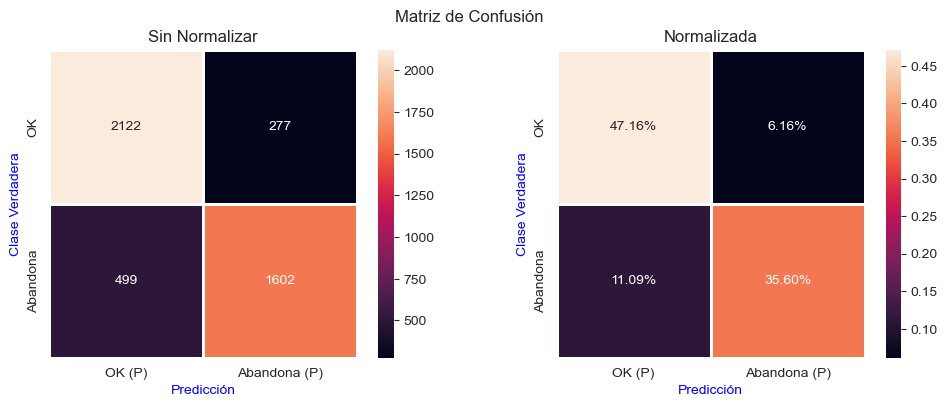

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2399
           1       0.85      0.76      0.81      2101

    accuracy                           0.83      4500
   macro avg       0.83      0.82      0.83      4500
weighted avg       0.83      0.83      0.83      4500



In [2489]:
guardar_y_mostrar_resultados('Arbol de decision´', y_test,arbol_decision_prediccion,arbol_decision_tiempo)
matriz_confusion(y_test,arbol_decision_prediccion )

### Random Forest

Resultados para el modelo: Random Forest
           Model  Accuracy  Precision   Recall    ROCAUC  F1-Score      Time
0  Random Forest  0.856889   0.888948  0.79248  0.852888  0.837947  0.600946 



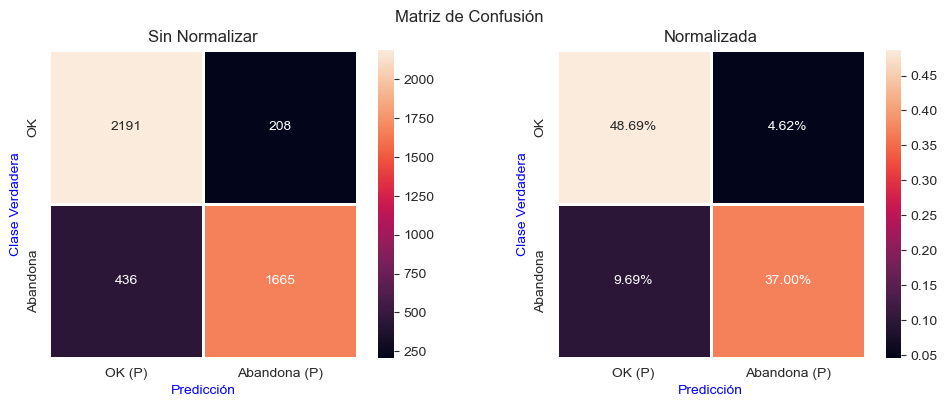

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2399
           1       0.89      0.79      0.84      2101

    accuracy                           0.86      4500
   macro avg       0.86      0.85      0.85      4500
weighted avg       0.86      0.86      0.86      4500



In [2490]:
guardar_y_mostrar_resultados('Random Forest', y_test,random_forest_prediccion,random_forest_tiempo)
matriz_confusion(y_test,random_forest_prediccion) 

### Regresión Logística

Resultados para el modelo: Regresion logistica
                 Model  Accuracy  Precision    Recall    ROCAUC  F1-Score  \
0  Regresion logistica  0.761111   0.751471  0.729653  0.759157  0.740401   

       Time  
0  0.014425   



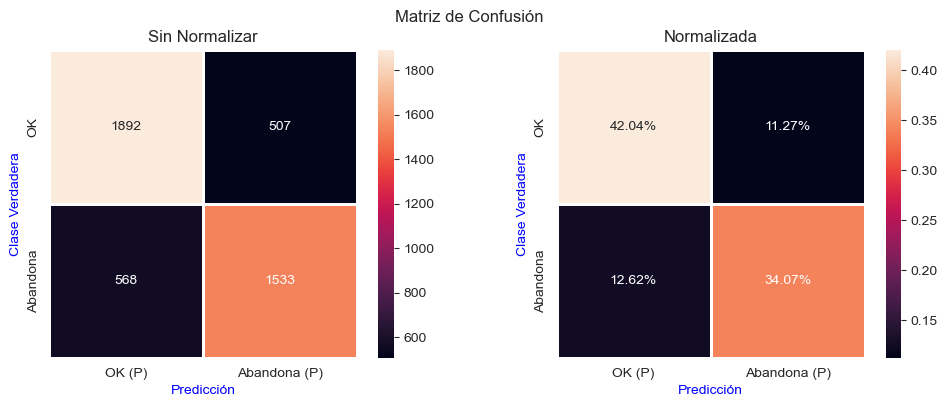

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      2399
           1       0.75      0.73      0.74      2101

    accuracy                           0.76      4500
   macro avg       0.76      0.76      0.76      4500
weighted avg       0.76      0.76      0.76      4500



In [2491]:
guardar_y_mostrar_resultados('Regresion logistica', y_test,regresion_prediccion,regresion_tiempo)
matriz_confusion(y_test,regresion_prediccion)

## Conclusiones

Como primera conclusión podemos observar que el dataset no posee la cantidad de datos suficientes para hacer un modelo confiable. Por ende debemos, como primera medida, recolectar mas datos y trabajarlos. Tuvimos que crear datos sinteticos para balancear el dataset y entrenar el modelo. Quizas no fueron suficientes las variables del dataset(numero de columnas) ni los registros. (el dataset lo obtuve de la lista que nos pasaron pero no tenia 15 columnas). 

Si obviamos esto y vamos directamente al comportamiento de los modelos, con los datos que contamos, podemos decir: que 
- Random Forest es el modelo que mejor se ajusta en metricas, es decir, es el mas performante. Pero posee un tiempo de ejecución considerablemte mayor que los otros modelos.
- Arbol de decision lo sigue a unos pasos en metricas y es mucho mas rapido.
- Regresión logistica no posee la misma calidad en metricas.

Por ende Random Forest es el modelo mas adecuado y lo sigue Arbol de decision. No se recomienda utilizar regresion logistica. 

Por último los pasos a seguir son: en primera medida recolectar más información, tanto en variables categoricas y numericas como en numero de registros. Segundo ver con el equipo de BI o engenieria de datos la posibilidad de incorporar a la tabla más campos que puedan ser relevantes para nuestro modelo. 